# **Housing Data Analysis**

## **Importing Libraries**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [15]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pakistan-house-price-prediction/Entities.csv


## **Loading Data**

In [16]:
df = pd.read_csv('/kaggle/input/pakistan-house-price-prediction/Entities.csv')
df.columns

Index(['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'property_type',
       'price', 'location', 'city', 'province_name', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Total_Area'],
      dtype='object')

## **Handling Missing Values**

In [17]:
df.isna().sum()

Unnamed: 0           0
property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Total_Area           0
dtype: int64

In [18]:
df['agency'] = df['agency'].fillna('Personal Listing')
df['agent'] = df['agent'].fillna('Personal Listing')

## **Checking for Duplicates**

In [19]:
df.duplicated().sum()

0

## **Data Cleansing**

In [20]:
df = df[(df['baths']>0) & (df['bedrooms']>0) & (df['Total_Area']>0) & (df['price'] >= 1000)]
df.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,Personal Listing,Personal Listing,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,Personal Listing,Personal Listing,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,Personal Listing,Personal Listing,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,Personal Listing,Personal Listing,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [21]:
df['property_type'] = df['property_type'].replace(['Upper Portion', 'Lower Portion'], 'Flat')

## **Useful Visualizations**

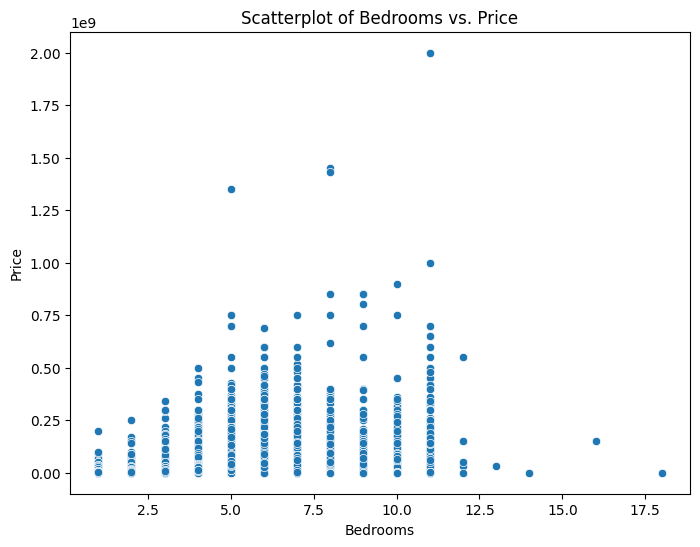

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['bedrooms'], y=df['price'])
plt.title("Scatterplot of Bedrooms vs. Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


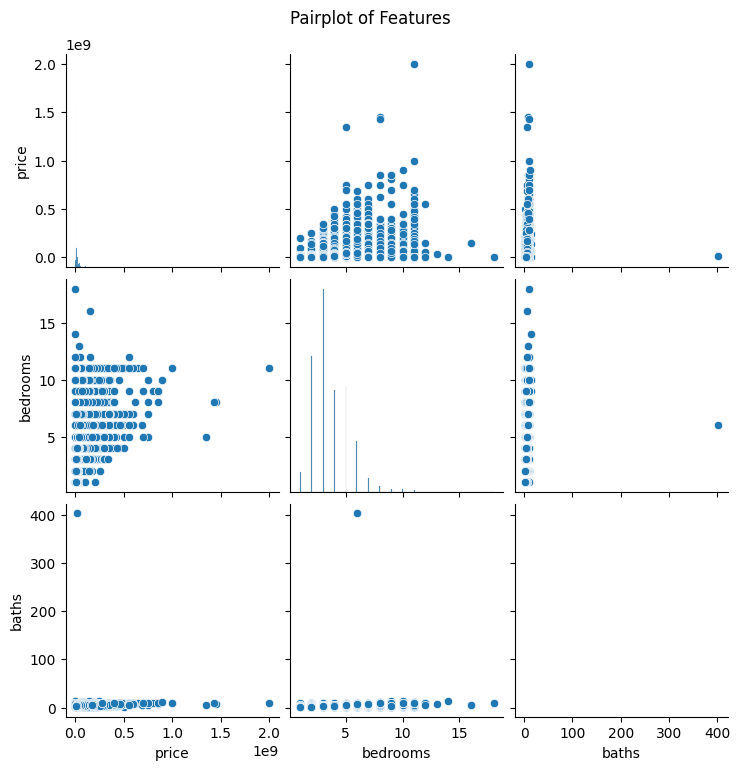

In [23]:
sns.pairplot(df[['price', 'bedrooms', 'baths']])
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

## **Outlier Detection**

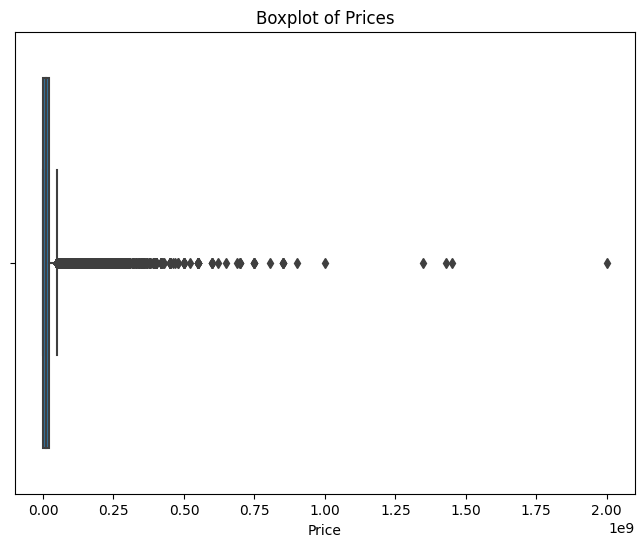

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Prices")
plt.xlabel("Price")
plt.show()

In [25]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
len(outliers)

9928

In [26]:
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

## **Feature Engineering**

In [27]:
df = df.drop(['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'agency', 'agent'], axis=1)
df.head(3)

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,Total_Area
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,1089.004
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,15246.056
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,2178.008


In [87]:
df['listing_date'] = pd.to_datetime(df['date_added'])
df['listing_month'] = df['listing_date'].dt.month
df['listing_year'] = df['listing_date'].dt.year
df.head(3)

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,Total_Area,listing_date,listing_month,listing_year
0,1,10000000,462,1,Islamabad Capital,33.679890,73.012640,2,1,2,2/4/2019,1089.004,2019-02-04,2,2019
1,1,6900000,392,1,Islamabad Capital,33.700993,72.971492,3,1,3,5/4/2019,15246.056,2019-05-04,5,2019
2,2,16500000,467,1,Islamabad Capital,33.631486,72.926559,6,1,5,7/17/2019,2178.008,2019-07-17,7,2019


# **Exploratory Data Analysis**

## **1. Total Listings**

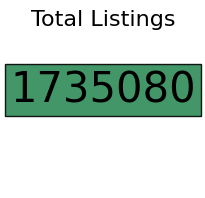

In [29]:
plt.figure(figsize=(2, 2))
plt.text(0.5, 0.5, f"{df.size}", fontsize=30, ha="center", va="bottom", bbox=dict(facecolor="seagreen", alpha=0.9))
plt.axis("off")
plt.title("Total Listings", fontsize=16)
plt.show()

## **2. Listings By Month**

In [30]:
listings_by_month = df.groupby('listing_month').size().reset_index(name='listings')
listings_by_month

,listing_month,listings
0,1,2553
1,2,3740
2,3,4141
3,4,6130
4,5,9334
5,6,33996
6,7,45618
7,8,1559
8,9,2093
9,10,2281


In [31]:
fig = px.line(listings_by_month, x='listing_month', y="listings")
fig.update_layout(title='Trends of Listings Across Months', xaxis_title='Month', yaxis_title='Listings')
fig.show()

## **3. Listings By Purpose**

In [32]:
sale = df.loc[df['purpose']=='For Sale',:]
rental = df.loc[df['purpose']=='For Rent',:]

In [33]:
listings = pd.Series([sale.size, rental.size])
listings_by_purpose = pd.DataFrame({'Purpose':['For Sale', 'For Rent'], 'Listings':listings})
listings_by_purpose

,Purpose,Listings
0,For Sale,1242285
1,For Rent,492795


In [34]:
fig = px.bar(listings_by_purpose, x='Purpose', y='Listings')
fig.update_layout(title='Listings by Purpose', width=700, height=600, bargap=0.4)
fig.show()

## **4. Listings By Property Type**

In [35]:
h_sale = sale.loc[sale['property_type']=='House',:]
f_sale = sale.loc[sale['property_type']=='Flat',:]
farm_sale = sale.loc[sale['property_type']=='Farm House',:]
p_sale = sale.loc[sale['property_type']=='Penthouse',:]

In [36]:
sale_listings =  pd.Series([h_sale.size, f_sale.size, farm_sale.size, p_sale.size])
sale_listings_by_property_type = pd.DataFrame({'Property Type':['House', 'Flat', 'Farm House', 'Penthouse'], 'Listings': sale_listings})
sale_listings_by_property_type

,Property Type,Listings
0,House,871590
1,Flat,366210
2,Farm House,1425
3,Penthouse,2850


In [37]:
fig = px.bar(sale_listings_by_property_type, x='Property Type', y='Listings')
fig.update_layout(title='Listings by Property Type (For Sale)', width=700, height=600, bargap=0.4, yaxis_type='log')
fig.show()

In [38]:
h_rental = rental.loc[rental['property_type']=='House',:]
f_rental = rental.loc[rental['property_type']=='Flat',:]
room_rental = rental.loc[rental['property_type']=='Room',:]
farm_rental = rental.loc[rental['property_type']=='Farm House',:]
p_rental = rental.loc[rental['property_type']=='Penthouse',:]

In [39]:
rental_listings =  pd.Series([h_rental.size, f_rental.size, room_rental.size, farm_rental.size, p_rental.size])
rental_listings_by_property_type = pd.DataFrame({'Property Type':['House', 'Flat', 'Room', 'Farm House', 'Penthouse'], 'Listings': rental_listings})
rental_listings_by_property_type

,Property Type,Listings
0,House,168465
1,Flat,315840
2,Room,6840
3,Farm House,465
4,Penthouse,1185


In [40]:
fig = px.bar(rental_listings_by_property_type, x='Property Type', y='Listings')
fig.update_layout(title='Listings by Property Type (For Rent)', width=700, height=600, bargap=0.4, yaxis_type='log')
fig.show()

## **5. Listings By City**

In [41]:
listings_by_city = df['city'].value_counts().reset_index(name='listings')
listings_by_city 

,city,listings
0,Karachi,43126
1,Lahore,30516
2,Islamabad,26139
3,Rawalpindi,13409
4,Faisalabad,2482


In [42]:
fig = px.bar(listings_by_city, x='city', y='listings')
fig.update_layout(title='Listings by City', xaxis_title='City',yaxis_title='Listings',width=700, height=600, bargap=0.3)
fig.show()

In [43]:
property_type_by_city = df.groupby(['city','property_type']).size().unstack()

In [44]:
fig = px.imshow(property_type_by_city)
fig.update_layout(title='Trend of Property Type Across Cities',height=600, width=700, xaxis_title=None, yaxis_title=None, template='seaborn')
fig.show()

## **6. Identifying Top Locations**

In [45]:
lahore = df.loc[df['city']=='Lahore', :].groupby(['location']).size().reset_index(name='listings')
top_10_lahore = lahore.sort_values(by='listings', ascending=False).head(10)

In [46]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y=top_10_lahore['location'], x=top_10_lahore['listings'], mode='markers', name='Value'))
fig.add_trace(go.Bar(y=top_10_lahore['location'], x=top_10_lahore['listings'], orientation='h', name='Bar', marker=dict(opacity=0.6),width=0.3))
fig.update_layout(title='Top 10 Most Popular Locations in Lahore', xaxis_title='Listings', yaxis_title='Locations', height=500)
fig.show()

In [47]:
karachi = df.loc[df['city']=='Karachi', :].groupby(['location']).size().reset_index(name='listings')
top_10_karachi = karachi.sort_values(by='listings', ascending=False).head(10)

In [48]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y=top_10_karachi['location'], x=top_10_karachi['listings'], mode='markers', name='Value'))
fig.add_trace(go.Bar(y=top_10_karachi['location'], x=top_10_karachi['listings'], orientation='h', name='Bar', marker=dict(opacity=0.6),width=0.3))
fig.update_layout(title='Top 10 Most Popular Locations in Karachi', xaxis_title='Listings', yaxis_title='Locations', height=500)
fig.show()

In [49]:
isb = df.loc[df['city']=='Islamabad', :].groupby(['location']).size().reset_index(name='listings')
top_10_isb = isb.sort_values(by='listings', ascending=False).head(10)

In [50]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y=top_10_isb['location'], x=top_10_isb['listings'], mode='markers', name='Value'))
fig.add_trace(go.Bar(y=top_10_isb['location'], x=top_10_isb['listings'], orientation='h', name='Bar', marker=dict(opacity=0.6),width=0.3))
fig.update_layout(title='Top 10 Most Popular Locations in Islamabad', xaxis_title='Listings', yaxis_title='Locations', height=500)
fig.show()

In [51]:
rwp = df.loc[df['city']=='Rawalpindi', :].groupby(['location']).size().reset_index(name='listings')
top_10_rwp = rwp.sort_values(by='listings', ascending=False).head(10)

In [52]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y=top_10_rwp['location'], x=top_10_rwp['listings'], mode='markers', name='Value'))
fig.add_trace(go.Bar(y=top_10_rwp['location'], x=top_10_rwp['listings'], orientation='h', name='Bar', marker=dict(opacity=0.6),width=0.3))
fig.update_layout(title='Top 10 Most Popular Locations in Rawalpindi', xaxis_title='Listings', yaxis_title='Locations', height=500)
fig.show()

In [53]:
fsb = df.loc[df['city']=='Faisalabad', :].groupby(['location']).size().reset_index(name='listings')
top_10_fsb = fsb.sort_values(by='listings', ascending=False).head(10)

In [54]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y=top_10_fsb['location'], x=top_10_fsb['listings'], mode='markers', name='Value'))
fig.add_trace(go.Bar(y=top_10_fsb['location'], x=top_10_fsb['listings'], orientation='h', name='Bar', marker=dict(opacity=0.6),width=0.3))
fig.update_layout(title='Top 10 Most Popular Locations in Faisalabad', xaxis_title='Listings', yaxis_title='Locations', height=500)
fig.show()

## **7. Price By Purpose**

In [55]:
sale_price_vs_beds = sale.groupby(['property_type', 'bedrooms'])['price'].mean().reset_index()
fig = px.scatter(sale_price_vs_beds, x='bedrooms', y='price', color='property_type', title='Average Property Price (For Sale) by Number of Beds and Property Type', labels={'beds': 'Number of Beds', 'price': 'Average Price'})
fig.update_layout(xaxis_title='Number of Beds', yaxis_title='Average Price', legend_title='Property Type', height = 700, width = 800)
fig.show()

In [56]:
rental_price_vs_beds = rental.groupby(['property_type', 'bedrooms'])['price'].mean().reset_index()
fig = px.scatter(rental_price_vs_beds, x='bedrooms', y='price', color='property_type', title='Average Property Price (For Rent) by Number of Beds and Property Type', labels={'beds': 'Number of Beds', 'price': 'Average Price'})
fig.update_layout(xaxis_title='Number of Beds', yaxis_title='Average Price', legend_title='Property Type', height = 700,width = 800)
fig.show()

## **8. Price By City**

In [57]:
city_wise_sale_price = h_sale.groupby(['city'])['price'].mean().reset_index()
city_wise_sale_price

,city,price
0,Faisalabad,1.144130e+07
1,Islamabad,1.974708e+07
2,Karachi,1.691124e+07
3,Lahore,1.833364e+07
4,Rawalpindi,1.530116e+07


In [58]:
h_sale_by_city = h_sale.groupby(['city', 'bedrooms'])['price'].mean().reset_index()
fig = px.line(h_sale_by_city, x='bedrooms', y='price', color='city', markers=True, title='Average House Sale Price by City', labels={'beds': 'Number of Beds', 'price': 'Average Price'})
fig.update_layout(xaxis_title='Number of Beds', yaxis_title='Average Price', legend_title='City', height = 700, width = 800)
fig.show()

In [59]:
h_rental_by_city = h_rental.groupby(['city', 'bedrooms'])['price'].mean().reset_index()
fig = px.line(h_rental_by_city, x='bedrooms', y='price', color='city', markers=True, title='Average House Rent Price by City', labels={'beds': 'Number of Beds', 'price': 'Average Price'})
fig.update_layout(xaxis_title='Number of Beds', yaxis_title='Average Price', legend_title='City',  height = 700, width = 800)
fig.show()

In [60]:
f_sale_by_city = f_sale.groupby(['city', 'bedrooms'])['price'].mean().reset_index()
fig = px.line(h_rental_by_city, x='bedrooms', y='price', color='city', markers=True, title='Average House Rent by City', labels={'beds': 'Number of Beds', 'price': 'Average Price'})
fig.update_layout(xaxis_title='Number of Beds', yaxis_title='Average Price', legend_title='City', height = 700, width = 800)
fig.show()

In [61]:
f_rental_by_city = f_rental.groupby(['city', 'bedrooms'])['price'].mean().reset_index()
fig = px.line(f_rental_by_city, x='bedrooms', y='price', color='city', markers=True, title='Average Flat Rent by City', labels={'beds': 'Number of Beds', 'price': 'Average Price'})
fig.update_layout(xaxis_title='Number of Beds', yaxis_title='Average Price', legend_title='City', height = 700, width = 800)
fig.show()

In [62]:
location_counts = sale['location'].value_counts()
locations_to_keep = location_counts[location_counts > 1].index
sale = sale[sale['location'].isin(locations_to_keep)]

## **9. Identifying Hot Locations**

In [99]:
avg = sale.groupby(['location', 'city'])['price'].mean().reset_index(name='average_price')
avg.head()

,location,city,average_price
0,204 Chak Road,Faisalabad,1.162857e+07
1,9th Avenue,Islamabad,2.450000e+07
2,AGHOSH,Islamabad,3.000000e+07
3,APP Employees Co-operative Housing Society,Karachi,3.900000e+07
4,ASF Housing Scheme,Karachi,4.664000e+06


In [101]:
fig = px.treemap(avg, path=['city', 'location'], values='average_price', color='average_price', title='Average Property Price by Location and City',template='ggplot2')
fig.update_layout(height = 800, width = 800)
fig.show()

## **10. Price Over Time**

In [92]:
month_sale = sale.groupby('listing_month')['price'].mean().reset_index(name='average_rent')
month_sale

,listing_month,average_rent
0,1,1.335292e+07
1,2,1.452847e+07
2,3,1.504048e+07
3,4,1.545248e+07
4,5,1.533500e+07
5,6,1.649088e+07
6,7,1.567337e+07
7,8,1.321506e+07
8,9,1.298541e+07
9,10,1.214493e+07


In [96]:
fig = px.line(month_sale, x='listing_month', y="average_rent")
fig.update_layout(xaxis_title='Month', yaxis_title='Average Sale Price',xaxis=dict(tickmode='array', tickvals=month_rent['listing_month'], ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']))
fig.show()

In [90]:
month_rent = rental.groupby('listing_month')['price'].mean().reset_index(name='average_rent')
month_rent

,listing_month,average_rent
0,1,66475.151515
1,2,87413.921917
2,3,86343.302443
3,4,101520.344288
4,5,87944.760648
5,6,99427.650595
6,7,104074.601185
7,8,73388.738532
8,9,71972.949389
9,10,95055.614458


In [91]:
fig = px.line(month_rent, x='listing_month', y="average_rent")
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Average Rent',
    xaxis=dict(
        tickmode='array',
        tickvals=month_rent['listing_month'],
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  # Custom labels
    )
)
fig.show()

## **Random Forest Regressor Model For Price Prediction**

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
features = ['price','property_type', 'purpose', 'city', 'bedrooms', 'baths']
examples = df.loc[:, features] 

In [104]:
le_property_type = LabelEncoder()
le_purpose = LabelEncoder()
le_city = LabelEncoder()

examples['property_type'] = le_property_type.fit_transform(examples['property_type'])
examples['purpose'] = le_purpose.fit_transform(examples['purpose'])
examples['city'] = le_city.fit_transform(examples['city'])

fig = px.imshow(examples.corr(),text_auto=True, title='Correlation Matrix')
fig.update_layout(xaxis_title='Features', yaxis_title='Features', coloraxis_colorbar=dict(title='Correlation'),font=dict(size=14))
fig.show()

In [80]:
X = examples.drop('price', axis=1)
y = examples['price']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)
    
y_pred = model.predict(X_test)

In [83]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(45027099183806.18, 0.6723700262425476)